In [65]:
#@title Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time  # Import the time module

#Data Preparation

In [66]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [67]:
print("TRAINNG DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_train.shape)
# Can see that we have one label for each of the 60,000 images
print(y_train.shape)

print("\nTESTING DATA")
# Can see that in x data we have 10,000 28x28 pixel images
print(x_test.shape)
# Can see that we have one label for each of the 10,000 images
print(y_test.shape)

print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])

TRAINNG DATA
(60000, 28, 28)
(60000,)

TESTING DATA
(10000, 28, 28)
(10000,)

 Testing to Training ratio = 0.16666666666666666


In [68]:
# Can see each element in x data is 28x28 array where each value is the grayscale value of the pixel from 0-255 where black(255)/white(0)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [69]:
# Normalize the x data to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [70]:
# Can see that we successfully normalized x data
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [71]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1666666, random_state=42)


In [72]:
print("TRAINNG DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_train.shape)

print("\nVALIDATION DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_val.shape)

print("\nTEST DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_test.shape)

print('\n Validation to Training ratio =', x_val.shape[0]/x_train.shape[0])
print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])


TRAINNG DATA
(50000, 28, 28)

VALIDATION DATA
(10000, 28, 28)

TEST DATA
(10000, 28, 28)

 Validation to Training ratio = 0.2

 Testing to Training ratio = 0.2


#Build and Compile the Model

In [253]:
# Build the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    keras.layers.Dense(units=128, activation='relu'),   # Fully connected layer
    keras.layers.Dense(units=60, activation='relu'),    # Additional hidden layer
    keras.layers.Dense(units=10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [254]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,830 (425.12 KB)

 Trainable params: 108,830 (425.12 KB)

 Non-trainable params: 0 (0.00 B)

In [255]:
# total number of parameters in model
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

# total number of trainable parameters in model
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
print(f"Number of trainable parameters: {trainable_params}")

Total number of parameters: 108830
Number of trainable parameters: 108830


In [256]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,830 (425.12 KB)

 Trainable params: 108,830 (425.12 KB)

 Non-trainable params: 0 (0.00 B)

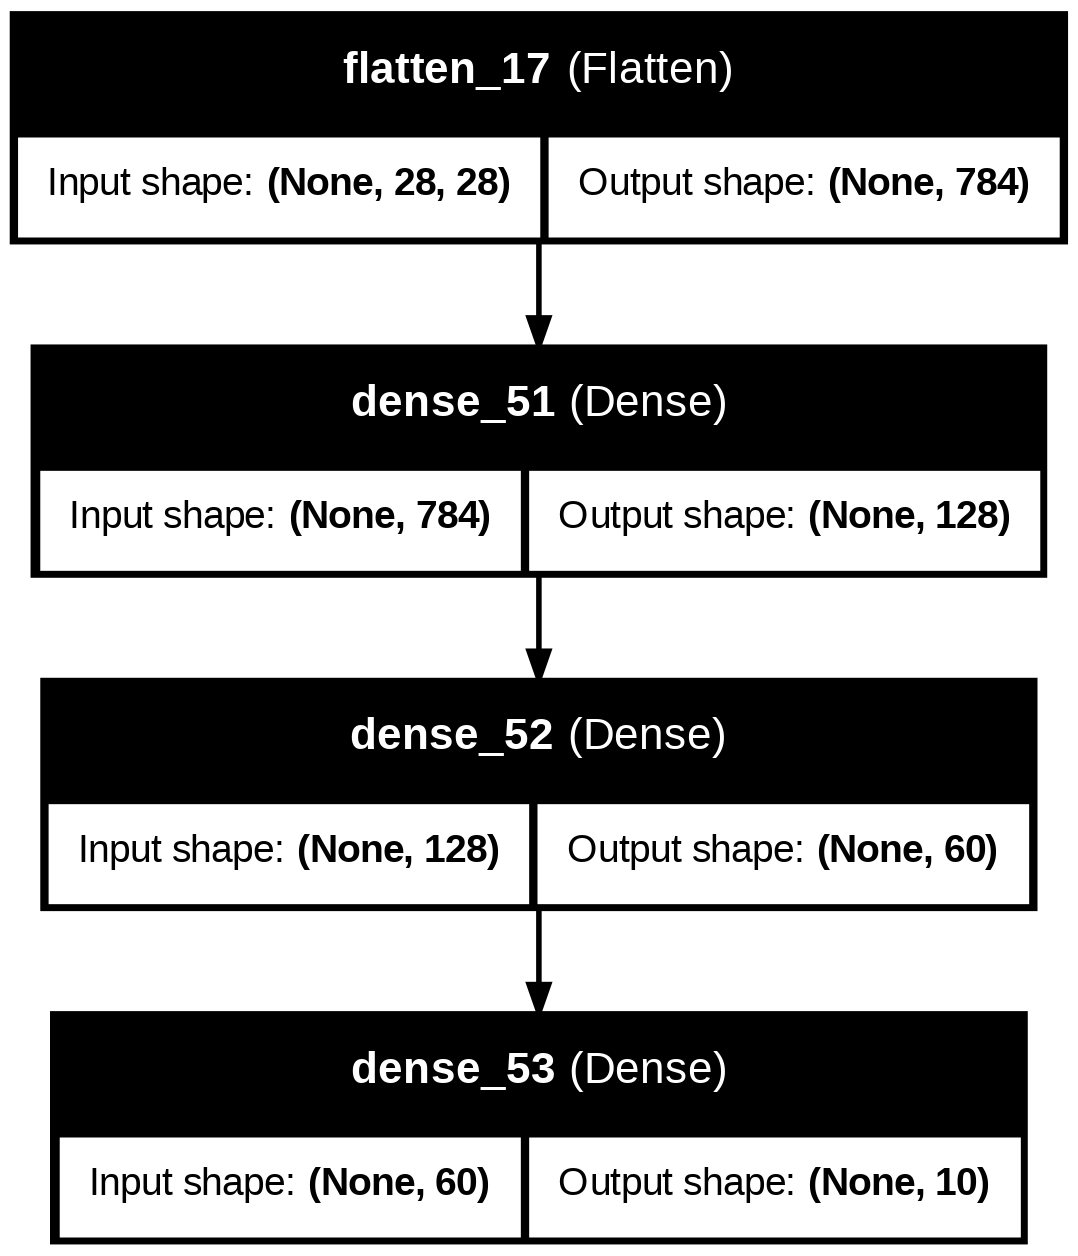

In [257]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='ANN_model.png', show_shapes=True, show_layer_names=True)

#Train the Model

In [258]:
# Train the Neural Network

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Stop the timer
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Print the training time
print("Training Time: {:.2f} seconds".format(training_time))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7620 - loss: 0.6759 - val_accuracy: 0.8529 - val_loss: 0.4100
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8641 - loss: 0.3769 - val_accuracy: 0.8647 - val_loss: 0.3653
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8750 - loss: 0.3396 - val_accuracy: 0.8693 - val_loss: 0.3554
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8829 - loss: 0.3206 - val_accuracy: 0.8752 - val_loss: 0.3415
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8935 - loss: 0.2894 - val_accuracy: 0.8716 - val_loss: 0.3586
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8932 - loss: 0.2840 - val_accuracy: 0.8860 - val_loss: 0.3149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8989 - loss: 0.2696 - val_accuracy: 0.8783 - val_loss: 0.3294
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9036 - loss: 0.2568 

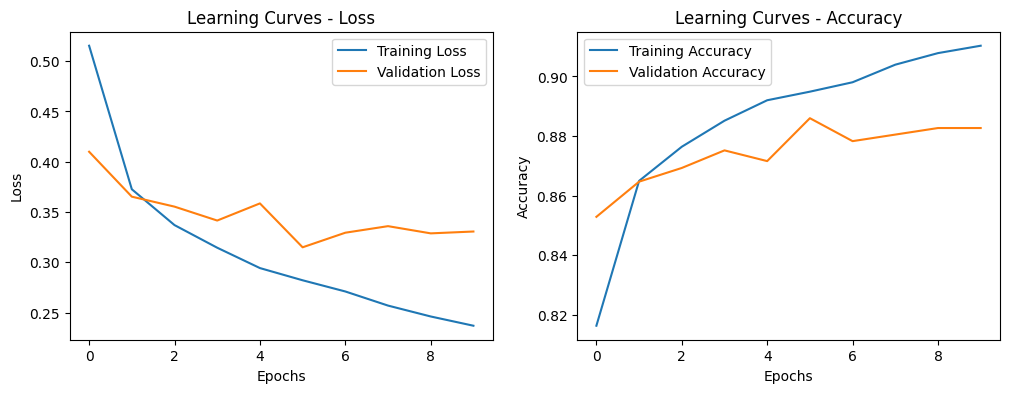

In [259]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model's performance was improved by adding two dense layers (128 and 60 units) with relu activation. Batch size of 32 and 10 epochs provided a balanced trade-off between training speed and accuracy. It was easy to work unlike CIFAR-10. Also provided good performance.

#Test Data Performance

In [260]:
# Have model make predictions on test data
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[9 2 1 ... 8 1 5]



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.74      0.72      1000
           7       0.89      0.98      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.98      0.90      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
 




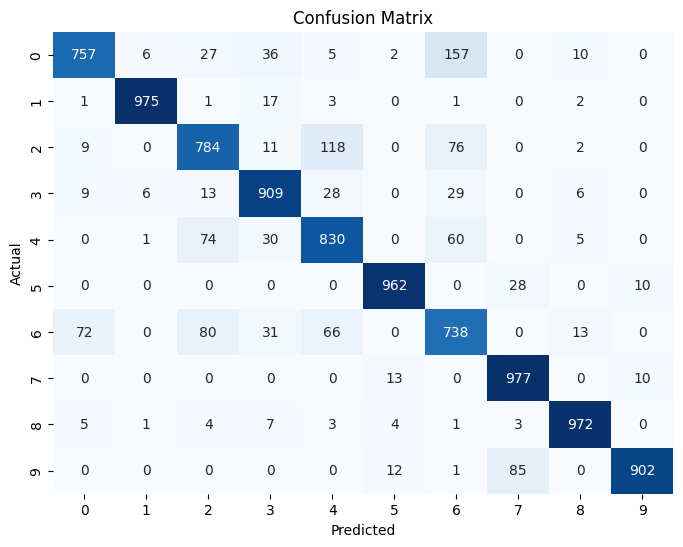

In [261]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred), '\n\n')

# Make confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

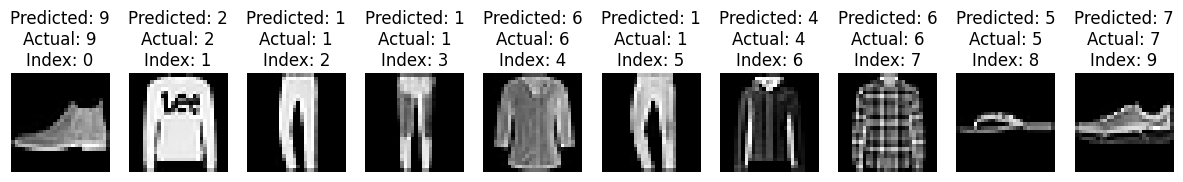

In [262]:
# Display some test images and their predicted labels
num_samples = 10
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}\nIndex: {i}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



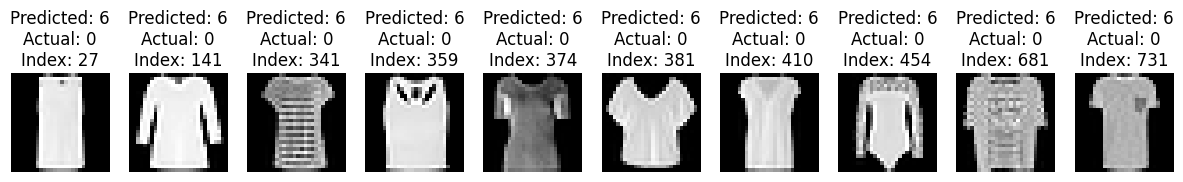

In [267]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==6) & (y_test==0) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 10)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



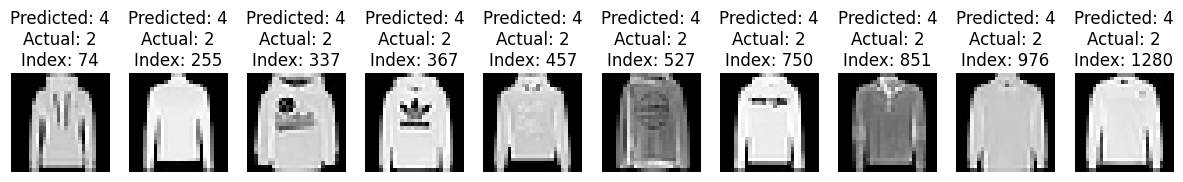

In [268]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==4) & (y_test==2) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 10)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

In [265]:
from sklearn.metrics import f1_score

# Calculate F1 score
test_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", test_f1_score)

F1 Score: 0.8807679060219455


In [266]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8806


#Summary and Reflection

The MNIST model was built with two dense layers, 128 and 60 units respectively, both using relu activation, followed by a softmax output layer for classification. The model achieved a strong accuracy of 0.96 using the adam optimizer and sparse_categorical_crossentropy loss.

**Challenges:** The main challenge was balancing the simplicity of the model with its performance. A smaller number of units risked underfitting, while increasing complexity could lead to overfitting.